In [5]:
import pyannote.core
from pydub import AudioSegment
import numpy as np
from pyannote.core import Segment

In [2]:
file = {'uri':'1043_meal', 'audio':'/Users/andrei-macpro/Documents/Data/Audio/Meal/1043_meal.wav'}

In [3]:
import torch
# overlapped speech detection trained on ami training set
model = torch.hub.load('pyannote/pyannote-audio', 'emb')

Using cache found in /Users/andrei-macpro/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/16.3M [00:00<?, ?B/s]

/Users/andrei-macpro/anaconda3/envs/pyannote/lib/python3.8/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)


In [4]:
print(f'Embedding has dimension {model.dimension:d}.')

Embedding has dimension 512.


In [6]:
embedding = model({'audio':'/Users/andrei-macpro/Documents/Data/Audio/Meal/1043_meal.wav'})
for window, emb in embedding:
    assert isinstance(window, Segment)
    assert isinstance(emb, np.ndarray)   

In [8]:
chunks = embedding.sliding_window
print(f'Embeddings were extracted every {1000 * chunks.step:g}ms on {1000 * chunks.duration:g}ms-long windows.')

Embeddings were extracted every 1000ms on 4000ms-long windows.


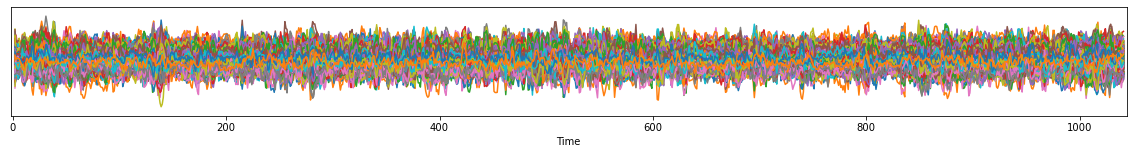

In [9]:
embedding

In [12]:
for window, emb in embedding:
    assert isinstance(window, Segment)
    assert isinstance(emb, np.ndarray)   

In [13]:
from scipy.spatial.distance import cdist
distance = cdist(np.mean(embedding, axis=0, keepdims=True), 
                 np.mean(embedding, axis=0, keepdims=True), 
                 metric='cosine')[0, 0]

In [15]:
for speaker in embedding:
    print(speaker)

(<Segment(0, 4)>, array([-2.89799362e-01, -3.94754678e-01, -9.55906436e-02, -8.09424520e-02,
       -1.58420771e-01,  2.58208305e-01,  1.43117771e-01,  3.21667969e-01,
       -9.24117863e-02, -2.40293562e-01,  2.40572438e-01,  1.47140682e-01,
       -1.20865867e-01, -2.36633927e-01, -5.16893342e-02, -3.14370155e-01,
        1.59991756e-01,  2.39995588e-02,  8.19061175e-02,  3.04288566e-02,
       -1.58331677e-01,  7.53489137e-02,  7.27082640e-02, -2.56715000e-01,
        3.29833850e-02,  2.36164689e-01,  1.28266543e-01,  3.41051668e-02,
        3.00669938e-01, -2.43169069e-03, -1.23724528e-01,  3.87212187e-02,
       -1.59137890e-01,  1.54367253e-01,  1.09062158e-02, -3.86426449e-01,
       -1.17250234e-01, -1.03986979e-01,  6.03335500e-02,  1.76463395e-01,
        3.27305734e-01, -3.57621238e-02,  9.26609337e-02,  8.89340043e-02,
        1.26422375e-01, -1.16515316e-01, -7.09741637e-02,  1.63127452e-01,
       -3.74399424e-01,  3.22014511e-01,  1.33739144e-01, -3.31189126e-01,
       

      dtype=float32))
(<Segment(67, 71)>, array([-1.53964952e-01, -4.39890116e-01, -2.30955333e-03, -1.44250870e-01,
       -1.91879496e-02,  2.08826810e-01,  1.38950571e-01, -4.43971157e-03,
        1.96675539e-01, -8.30507874e-02,  1.41408876e-01,  1.38875656e-02,
       -7.73818195e-02,  1.01626426e-01,  2.90647149e-02,  5.57843596e-02,
       -1.44610032e-01, -1.22848526e-02, -6.78599179e-02,  2.37647444e-01,
        2.54744411e-01, -6.36867136e-02, -7.14064240e-02, -7.38666356e-02,
       -2.08228324e-02, -6.99564517e-02,  1.29063606e-01, -1.36382282e-02,
        1.60574600e-01,  6.12753034e-02, -7.31161684e-02,  3.39637920e-02,
        9.22592431e-02,  1.83749184e-01,  3.13965529e-02, -1.87179744e-01,
       -2.03277320e-02, -3.39500383e-02,  1.83515072e-01,  1.16286352e-01,
        4.53651957e-02,  4.60910723e-02, -3.20518315e-02,  7.76266605e-02,
        2.73085117e-01,  1.96736120e-02,  6.14729784e-02,  2.27191895e-01,
        4.17635739e-02,  1.79821089e-01, -8.03981721e-02, 

       -0.11413425, -0.00346491], dtype=float32))
(<Segment(140, 144)>, array([-1.05644912e-01, -1.54068559e-01,  1.02097973e-01,  5.25465310e-02,
        5.82497865e-02,  1.60789996e-01, -6.83464110e-02,  2.64441103e-01,
       -6.01235814e-02, -1.96025640e-01,  3.89960818e-02, -2.68784016e-02,
        7.39940107e-02, -1.21301480e-01,  9.04670805e-02, -2.00462893e-01,
       -3.03749055e-01, -4.66357768e-02,  1.38288885e-01,  7.00811297e-02,
        2.07757041e-01,  1.68531507e-01,  1.89177990e-01, -1.20583706e-01,
       -1.41190305e-01, -2.16644198e-01,  7.19301552e-02, -1.02194622e-01,
       -1.24406658e-01,  1.45598859e-01, -1.44041270e-01,  2.50193894e-01,
        4.19165790e-02,  2.00899124e-01,  1.53738737e-01, -9.31905955e-03,
       -2.08077729e-01, -1.15183122e-01, -1.07075348e-01,  1.28974378e-01,
        2.16960877e-01, -8.75613913e-02, -1.11808240e-01, -5.26148081e-03,
        4.29553330e-01,  1.51187360e-01,  2.51963258e-01,  1.32972091e-01,
       -1.16947182e-02, -9.4

      dtype=float32))
(<Segment(207, 211)>, array([-1.58577889e-01, -3.56593579e-01,  4.38976809e-02, -1.36417449e-02,
       -1.90172553e-01,  2.68450975e-01,  1.73029423e-01,  1.87761962e-01,
        4.61257324e-02, -1.29934043e-01,  3.77422273e-02, -1.42848864e-03,
        4.75315936e-02, -1.17525719e-01, -2.74852142e-02, -8.13927874e-03,
       -1.47247136e-01, -4.99876253e-02, -2.41810083e-03,  1.37312770e-01,
       -7.54596889e-02, -1.59910738e-01,  5.99399209e-03, -2.74298459e-01,
       -2.36782059e-02, -2.06679404e-02,  1.71509653e-01,  8.87155533e-03,
        9.89902690e-02, -1.36696249e-02, -1.07175186e-01,  1.43015143e-02,
        9.48828459e-03,  1.84609056e-01,  1.46719128e-01, -9.68631133e-02,
        2.17602625e-02, -3.91805023e-02,  1.37114018e-01,  2.54757196e-01,
        1.64902508e-01,  1.48077726e-01, -2.64259577e-02,  1.06816672e-01,
        1.89860433e-01, -9.71034169e-04,  8.46048295e-02,  2.96944410e-01,
       -1.09714687e-01,  2.49381155e-01,  2.01329768e-01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
type(embedding)

pyannote.core.feature.SlidingWindowFeature